<figure>
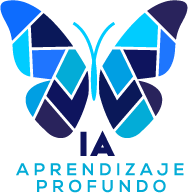 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Visualización del Entrenamiento de una Red Neuronal</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Generación de Datos](#Generación-de-Datos)
* [Separación de Datos](#Separación-de-Datos)
* [Matemáticas](#Matemáticas)
* [Transformación de problemas](#Transformación-de-problemas)
* [Tecnología](#Tecnología)
* [Arquitecturas Neuronales Paradigma](#Arquitecturas-Neuronales-Paradigma)

## <span style="color:blue">Introducción</span>

Hasta este punto, sabemos los resultados de una red neuronal, pero ¿sabemos qué ocurre en el proceso de entrenamiento de manera visual?

La idea de este Notebook es generar una animación de la red neuronal mientras se entrena para mejorar la intuición del funcionamiento interno de estos modelos.

Para esto, necesitaremos:

- **Librerías de IA**
- **Librerías de Animación**

También usaremos los **widgets** de JupyterLab para mejorar la interactividad del contacto con imágenes generadas.

import sys
!conda install --yes --prefix {sys.prefix} ipympl

In [3]:
# Librería para manejo de tensores
import tensorflow as tf
# API para AI sobre motor de tensores (tensorflow)
from tensorflow import keras
# Manejo de arreglos
import numpy as np
# Manejo de DataFrames
import pandas as pd
# Dibujos matplotlib
import matplotlib.pyplot as plt
# Dibujos en seaborn
import seaborn as sns
#Hacer Animación
from matplotlib.animation import FuncAnimation
# Escribir en gif, mp4, etc...
from matplotlib import animation
# Sacar animación en una ventana aparte
%matplotlib widget
from IPython import display

## <span style="color:blue">Generación de Datos</span>

Para este ejemplo sencillo, haremos un ejercicio de simulación.

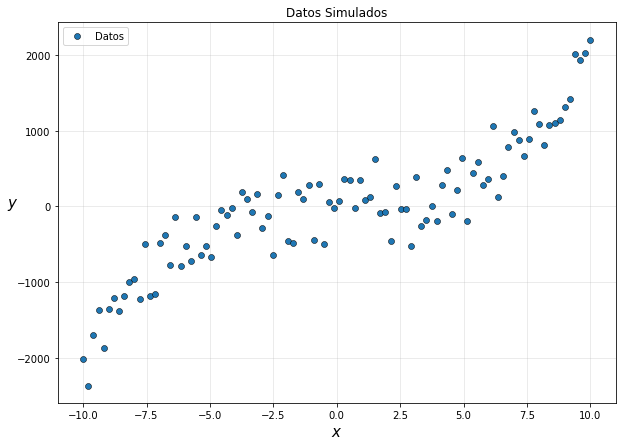

In [8]:
# Genera datos espaciados uniformemente
%matplotlib inline
x=np.linspace(-10,10,100)
# Modelo generado a partir de las entradas ax^3+bx+ϵ
y=2*x**3+3*x+5*np.random.normal(0,50,size=len(x))


# Generar Lienzo
plt.close('all')
fig = plt.figure(figsize=(10,7))

plt.plot(x,y,'o',markeredgecolor='k',markeredgewidth=0.5)
plt.grid(alpha=0.3)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)
plt.title('Datos Simulados')
plt.legend(['Datos'])
plt.show()

## <span style="color:blue">Separación de Datos</span>

Es buena práctica separar el conjunto de datos en:

- Datos de Entrenamiento
- Datos de Validación
- Datos Test

Forma de Train: (70,)
Forma de Test : (30,)


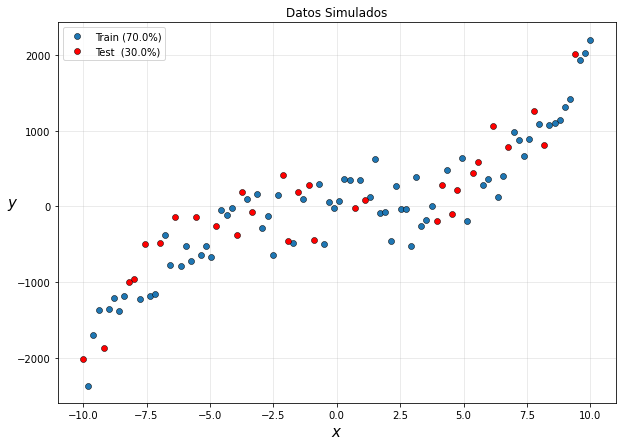

In [9]:
%matplotlib inline
from sklearn.model_selection import train_test_split

# Tamaño del conjunto Test
test_size = 0.30
# Separación del Dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Forma de los Datos Resultantes
print("Forma de Train:", x_train.shape)
print("Forma de Test :",x_test.shape)

# Generar Lienzo
plt.close('all')
fig = plt.figure(figsize=(10,7))
plt.grid(alpha=0.3)
# Dibujar train
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5)
# Dibujar test
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5)
# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)
# Leyendas
plt.legend([f'Train ({(1-test_size)*100}%)',f'Test  ({(test_size)*100}%)'])
plt.title('Datos Simulados');

## <span style="color:blue">Creación de Modelos</span>

### <span style="color:blue">Modelo sin Activaciones</span>

Para ilustrar lo lineal de un modelo simple (sin funciones de activación), miremos qué pasa cuando tenemos una red con una única neurona:

In [10]:
# Arquitectura del Modelo
model = keras.Sequential(
    # Una capa densa, 1 neurona, 1 variable de entrada
    keras.layers.Dense(units=1,input_shape=(1,))
    )

# Compilación del Modelo usando optimizador y pérdida
model.compile(optimizer='sgd', loss='mean_squared_error')
# Resumen del Modelo (Parámetros, etc)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
n_iter=100

predecir=np.zeros((n_iter+1,len(x_train)))

predecir[0,:]=model.predict(sorted(x_train)).reshape(1,-1)

for i in range(n_iter):
    # Entrenar 1 epoch
    model.fit(x_train, y_train, epochs=1,verbose=1,validation_split=0.1)
    # Predecir puntos en ese estado
    predecir[i+1,:]=model.predict(sorted(x_train)).reshape(1,-1)

2/2 [==============================] - 0s 54ms/step - loss: 174129.0000 - val_loss: 149748.9844


2/2 [==============================] - ETA: 0s - loss: 158819.40 - 0s 50ms/step - loss: 171021.6875 - val_loss: 145518.7188


In [12]:
def animate(i):
    if i<n_iter:
        line.set_ydata(predecir[i,:])

In [14]:
!conda install --yes --prefix {sys.prefix} -c conda-forge ffmpeg

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    ffmpeg-4.3.1               |       ha925a31_0        26.2 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        27.2 MB

The following NEW packages will be INSTALLED:

  ffmpeg             conda-forge/win-64::ffmpeg-4.3.1-ha925a31_0
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.13.0-py39haa95532_0 --> conda-forge::conda-4.14.0-py39hcbf5309_0




ffmpeg-4.3.1         | 26.2 MB   |            |   0% 
ffmpeg-4.3.1         | 26.2 MB   |            |   0

In [15]:
fig = plt.figure(figsize=(12,5))


axes = fig.add_subplot(1,2,1)
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5,alpha=0.3)

line, = axes.plot(sorted(x_train), predecir[0,:], 'g-')

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Visualizando Red Neuronal');

# Animación
ani = FuncAnimation(fig=fig, func=animate, interval=100)

# Visualización de Modelo para Datos Test
axes2 = fig.add_subplot(1,2,2)
predecir_test = model.predict(sorted(x_test),verbose=0).reshape(-1)
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5,alpha=0.1)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(sorted(x_test),predecir_test,'g-',scaley=True, scalex=True)

# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Modelo Entrenado para Test');

# Video para renderizar
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()

### <span style="color:blue">Modelo con Activaciones y Profundidad</span>

In [16]:
model2 = tf.keras.Sequential([
    # 4 Capas densas con función de activación
    keras.layers.Dense(units=5,input_shape=(1,),activation='softplus'),
    keras.layers.Dense(units=10,activation='softplus'),
    keras.layers.Dense(units=20,activation='softplus'),
    keras.layers.Dense(units=1)
    ])
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 10        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
 dense_3 (Dense)             (None, 20)                220       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [17]:
n_iter=100

predecir2=np.zeros((n_iter+1,len(x_train)))
predecir2[0,:]=model2.predict(sorted(x_train)).reshape(1,-1)

for i in range(n_iter):
    model2.fit(x_train, y_train, epochs=30,verbose=1,validation_split=0.1)
    predecir2[i+1,:]=model2.predict(sorted(x_train)).reshape(1,-1)

Epoch 1/30
2/2 [==============================] - 0s 115ms/step - loss: 777138.4375 - val_loss: 504700.5000
Epoch 2/30
2/2 [==============================] - 0s 33ms/step - loss: 777055.6875 - val_loss: 504630.9062
Epoch 3/30
2/2 [==============================] - 0s 33ms/step - loss: 776962.4375 - val_loss: 504561.9062
Epoch 4/30
2/2 [==============================] - 0s 32ms/step - loss: 776883.3125 - val_loss: 504491.2188
Epoch 5/30
2/2 [==============================] - 0s 33ms/step - loss: 776795.5000 - val_loss: 504420.2812
Epoch 6/30
2/2 [==============================] - 0s 37ms/step - loss: 776706.3125 - val_loss: 504349.0625
Epoch 7/30
2/2 [==============================] - 0s 34ms/step - loss: 776619.8750 - val_loss: 504276.8125
Epoch 8/30
2/2 [==============================] - 0s 35ms/step - loss: 776539.0625 - val_loss: 504203.2812
Epoch 9/30
2/2 [==============================] - 0s 34ms/step - loss: 776444.1875 - val_loss: 504129.2812
Epoch 10/30
2/2 [===================

Epoch 17/30
2/2 [==============================] - 0s 30ms/step - loss: 754186.4375 - val_loss: 485599.3438
Epoch 18/30
2/2 [==============================] - 0s 28ms/step - loss: 753298.3125 - val_loss: 484863.1562
Epoch 19/30
2/2 [==============================] - 0s 28ms/step - loss: 752353.3750 - val_loss: 484106.7188
Epoch 20/30
2/2 [==============================] - 0s 25ms/step - loss: 751410.3125 - val_loss: 483326.2500
Epoch 21/30
2/2 [==============================] - 0s 27ms/step - loss: 750335.6875 - val_loss: 482538.2188
Epoch 22/30
2/2 [==============================] - 0s 35ms/step - loss: 749438.9375 - val_loss: 481708.7188
Epoch 23/30
2/2 [==============================] - 0s 35ms/step - loss: 748375.7500 - val_loss: 480856.2812
Epoch 24/30
2/2 [==============================] - 0s 23ms/step - loss: 747266.2500 - val_loss: 479981.3438
Epoch 25/30
2/2 [==============================] - 0s 27ms/step - loss: 746205.8125 - val_loss: 479072.2188
Epoch 26/30
2/2 [===========

Epoch 3/30
2/2 [==============================] - 0s 29ms/step - loss: 565265.0000 - val_loss: 340585.0000
Epoch 4/30
2/2 [==============================] - 0s 27ms/step - loss: 560939.3125 - val_loss: 337533.3438
Epoch 5/30
2/2 [==============================] - 0s 24ms/step - loss: 557018.1875 - val_loss: 334421.5938
Epoch 6/30
2/2 [==============================] - 0s 27ms/step - loss: 552454.3125 - val_loss: 331327.0625
Epoch 7/30
2/2 [==============================] - 0s 26ms/step - loss: 547921.3750 - val_loss: 328243.5000
Epoch 8/30
2/2 [==============================] - 0s 28ms/step - loss: 543641.5000 - val_loss: 325131.5625
Epoch 9/30
2/2 [==============================] - 0s 26ms/step - loss: 539020.1875 - val_loss: 322029.5000
Epoch 10/30
2/2 [==============================] - 0s 30ms/step - loss: 534911.8125 - val_loss: 318876.0625
Epoch 11/30
2/2 [==============================] - 0s 27ms/step - loss: 530061.8125 - val_loss: 315763.1562
Epoch 12/30
2/2 [==================

2/2 [==============================] - 0s 27ms/step - loss: 256484.1094 - val_loss: 160699.0781
Epoch 20/30
2/2 [==============================] - 0s 28ms/step - loss: 254435.8125 - val_loss: 159776.2344
Epoch 21/30
2/2 [==============================] - 0s 28ms/step - loss: 251505.0469 - val_loss: 158807.6719
Epoch 22/30
2/2 [==============================] - 0s 26ms/step - loss: 249485.4531 - val_loss: 157922.2500
Epoch 23/30
2/2 [==============================] - 0s 26ms/step - loss: 246701.1406 - val_loss: 157038.7344
Epoch 24/30
2/2 [==============================] - 0s 27ms/step - loss: 244530.6562 - val_loss: 156159.9531
Epoch 25/30
2/2 [==============================] - 0s 27ms/step - loss: 242564.6094 - val_loss: 155214.2188
Epoch 26/30
2/2 [==============================] - 0s 25ms/step - loss: 240642.3125 - val_loss: 154402.3594
Epoch 27/30
2/2 [==============================] - 0s 27ms/step - loss: 238075.9219 - val_loss: 153597.7812
Epoch 28/30
2/2 [=======================

Epoch 5/30
2/2 [==============================] - 0s 30ms/step - loss: 183686.5781 - val_loss: 136470.9844
Epoch 6/30
2/2 [==============================] - 0s 26ms/step - loss: 183555.8125 - val_loss: 136508.5938
Epoch 7/30
2/2 [==============================] - 0s 28ms/step - loss: 183380.7344 - val_loss: 136442.2969
Epoch 8/30
2/2 [==============================] - 0s 28ms/step - loss: 183227.7812 - val_loss: 136446.2812
Epoch 9/30
2/2 [==============================] - 0s 27ms/step - loss: 183125.5312 - val_loss: 136534.3750
Epoch 10/30
2/2 [==============================] - 0s 28ms/step - loss: 183078.7344 - val_loss: 136603.8594
Epoch 11/30
2/2 [==============================] - 0s 28ms/step - loss: 182969.4844 - val_loss: 136755.8594
Epoch 12/30
2/2 [==============================] - 0s 30ms/step - loss: 182772.9844 - val_loss: 136497.5469
Epoch 13/30
2/2 [==============================] - 0s 26ms/step - loss: 182652.6406 - val_loss: 136331.4844
Epoch 14/30
2/2 [================

Epoch 21/30
2/2 [==============================] - 0s 35ms/step - loss: 177519.6719 - val_loss: 135845.5312
Epoch 22/30
2/2 [==============================] - 0s 30ms/step - loss: 177471.2969 - val_loss: 135902.2656
Epoch 23/30
2/2 [==============================] - 0s 30ms/step - loss: 177345.1562 - val_loss: 135751.1406
Epoch 24/30
2/2 [==============================] - 0s 30ms/step - loss: 177279.1562 - val_loss: 135636.4688
Epoch 25/30
2/2 [==============================] - 0s 32ms/step - loss: 177307.3281 - val_loss: 135293.3750
Epoch 26/30
2/2 [==============================] - 0s 31ms/step - loss: 177149.7188 - val_loss: 135156.6250
Epoch 27/30
2/2 [==============================] - 0s 36ms/step - loss: 177108.5938 - val_loss: 135218.3438
Epoch 28/30
2/2 [==============================] - 0s 34ms/step - loss: 176999.9688 - val_loss: 135155.2656
Epoch 29/30
2/2 [==============================] - 0s 30ms/step - loss: 176970.9844 - val_loss: 135263.7969
Epoch 30/30
2/2 [===========

2/2 [==============================] - 0s 28ms/step - loss: 173583.2344 - val_loss: 133784.9531
Epoch 8/30
2/2 [==============================] - 0s 32ms/step - loss: 173560.9375 - val_loss: 133928.7031
Epoch 9/30
2/2 [==============================] - 0s 29ms/step - loss: 173445.9375 - val_loss: 133864.5781
Epoch 10/30
2/2 [==============================] - 0s 34ms/step - loss: 173398.1875 - val_loss: 133845.4219
Epoch 11/30
2/2 [==============================] - 0s 37ms/step - loss: 173444.4375 - val_loss: 133983.0625
Epoch 12/30
2/2 [==============================] - 0s 28ms/step - loss: 173450.4375 - val_loss: 133627.8906
Epoch 13/30
2/2 [==============================] - 0s 29ms/step - loss: 173300.6406 - val_loss: 133540.0938
Epoch 14/30
2/2 [==============================] - 0s 31ms/step - loss: 173265.4219 - val_loss: 133617.0156
Epoch 15/30
2/2 [==============================] - 0s 35ms/step - loss: 173207.6406 - val_loss: 133636.3906
Epoch 16/30
2/2 [=========================

2/2 [==============================] - 0s 34ms/step - loss: 170691.8906 - val_loss: 132799.4688
Epoch 24/30
2/2 [==============================] - 0s 30ms/step - loss: 170659.1094 - val_loss: 132519.4844
Epoch 25/30
2/2 [==============================] - 0s 30ms/step - loss: 170593.1719 - val_loss: 132359.5000
Epoch 26/30
2/2 [==============================] - 0s 32ms/step - loss: 170542.2812 - val_loss: 132290.2031
Epoch 27/30
2/2 [==============================] - 0s 29ms/step - loss: 170506.5469 - val_loss: 132286.8906
Epoch 28/30
2/2 [==============================] - 0s 32ms/step - loss: 170478.8750 - val_loss: 132205.7188
Epoch 29/30
2/2 [==============================] - 0s 29ms/step - loss: 170490.9688 - val_loss: 132352.9688
Epoch 30/30
2/2 [==============================] - 0s 33ms/step - loss: 170403.0469 - val_loss: 132380.5156
Epoch 1/30
2/2 [==============================] - 0s 61ms/step - loss: 170386.7188 - val_loss: 132439.9688
Epoch 2/30
2/2 [=========================

2/2 [==============================] - 0s 29ms/step - loss: 167914.2031 - val_loss: 131368.5000
Epoch 10/30
2/2 [==============================] - 0s 32ms/step - loss: 167899.0469 - val_loss: 131434.2344
Epoch 11/30
2/2 [==============================] - 0s 31ms/step - loss: 167845.0156 - val_loss: 131413.2500
Epoch 12/30
2/2 [==============================] - 0s 28ms/step - loss: 167854.7969 - val_loss: 131498.3594
Epoch 13/30
2/2 [==============================] - 0s 36ms/step - loss: 167823.6719 - val_loss: 131301.3281
Epoch 14/30
2/2 [==============================] - 0s 30ms/step - loss: 167790.4062 - val_loss: 131397.2031
Epoch 15/30
2/2 [==============================] - 0s 29ms/step - loss: 167706.7188 - val_loss: 131353.7812
Epoch 16/30
2/2 [==============================] - 0s 32ms/step - loss: 167683.5938 - val_loss: 131146.1250
Epoch 17/30
2/2 [==============================] - 0s 35ms/step - loss: 167642.2500 - val_loss: 130995.4141
Epoch 18/30
2/2 [=======================

Epoch 25/30
2/2 [==============================] - 0s 34ms/step - loss: 165230.1875 - val_loss: 129694.5000
Epoch 26/30
2/2 [==============================] - 0s 31ms/step - loss: 165188.8750 - val_loss: 129744.6016
Epoch 27/30
2/2 [==============================] - 0s 36ms/step - loss: 165180.8594 - val_loss: 129880.0000
Epoch 28/30
2/2 [==============================] - 0s 33ms/step - loss: 165149.8125 - val_loss: 129751.2109
Epoch 29/30
2/2 [==============================] - 0s 29ms/step - loss: 165098.9219 - val_loss: 129676.5547
Epoch 30/30
2/2 [==============================] - 0s 28ms/step - loss: 165048.0938 - val_loss: 129794.8281
Epoch 1/30
2/2 [==============================] - 0s 59ms/step - loss: 165022.5781 - val_loss: 129731.4531
Epoch 2/30
2/2 [==============================] - 0s 32ms/step - loss: 165070.9844 - val_loss: 129984.0078
Epoch 3/30
2/2 [==============================] - 0s 30ms/step - loss: 164937.4531 - val_loss: 129952.8906
Epoch 4/30
2/2 [===============

2/2 [==============================] - 0s 36ms/step - loss: 162573.5938 - val_loss: 128602.1953
Epoch 12/30
2/2 [==============================] - 0s 30ms/step - loss: 162506.3438 - val_loss: 128610.7422
Epoch 13/30
2/2 [==============================] - 0s 30ms/step - loss: 162511.0781 - val_loss: 128799.2344
Epoch 14/30
2/2 [==============================] - 0s 29ms/step - loss: 162439.0156 - val_loss: 128817.1641
Epoch 15/30
2/2 [==============================] - 0s 38ms/step - loss: 162389.7031 - val_loss: 128796.2109
Epoch 16/30
2/2 [==============================] - 0s 29ms/step - loss: 162370.4375 - val_loss: 128676.1484
Epoch 17/30
2/2 [==============================] - 0s 35ms/step - loss: 162342.3594 - val_loss: 128739.6641
Epoch 18/30
2/2 [==============================] - 0s 33ms/step - loss: 162302.5781 - val_loss: 128728.5703
Epoch 19/30
2/2 [==============================] - 0s 38ms/step - loss: 162263.8750 - val_loss: 128598.5000
Epoch 20/30
2/2 [=======================

2/2 [==============================] - 0s 29ms/step - loss: 159860.4688 - val_loss: 127425.5859
Epoch 28/30
2/2 [==============================] - 0s 28ms/step - loss: 159909.7500 - val_loss: 127598.0547
Epoch 29/30
2/2 [==============================] - 0s 28ms/step - loss: 159829.4844 - val_loss: 127397.9141
Epoch 30/30
2/2 [==============================] - 0s 28ms/step - loss: 159765.0469 - val_loss: 127425.5859
Epoch 1/30
2/2 [==============================] - 0s 64ms/step - loss: 159753.4219 - val_loss: 127500.5469
Epoch 2/30
2/2 [==============================] - 0s 31ms/step - loss: 159690.2969 - val_loss: 127325.7422
Epoch 3/30
2/2 [==============================] - 0s 32ms/step - loss: 159652.2500 - val_loss: 127323.2578
Epoch 4/30
2/2 [==============================] - 0s 29ms/step - loss: 159602.5312 - val_loss: 127244.2422
Epoch 5/30
2/2 [==============================] - 0s 33ms/step - loss: 159663.3281 - val_loss: 126975.8203
Epoch 6/30
2/2 [=============================

Epoch 13/30
2/2 [==============================] - 0s 33ms/step - loss: 157158.3125 - val_loss: 125921.2891
Epoch 14/30
2/2 [==============================] - 0s 35ms/step - loss: 157132.7031 - val_loss: 125868.2109
Epoch 15/30
2/2 [==============================] - 0s 30ms/step - loss: 157112.2500 - val_loss: 125955.3281
Epoch 16/30
2/2 [==============================] - 0s 34ms/step - loss: 157048.9688 - val_loss: 125946.1875
Epoch 17/30
2/2 [==============================] - 0s 31ms/step - loss: 157058.7969 - val_loss: 126075.6797
Epoch 18/30
2/2 [==============================] - 0s 33ms/step - loss: 156997.0156 - val_loss: 125931.7422
Epoch 19/30
2/2 [==============================] - 0s 32ms/step - loss: 156936.4844 - val_loss: 125940.2109
Epoch 20/30
2/2 [==============================] - 0s 33ms/step - loss: 156939.2969 - val_loss: 125981.0859
Epoch 21/30
2/2 [==============================] - 0s 33ms/step - loss: 156911.4688 - val_loss: 125832.0703
Epoch 22/30
2/2 [===========

2/2 [==============================] - 0s 26ms/step - loss: 154510.2500 - val_loss: 124579.8203
Epoch 30/30
2/2 [==============================] - 0s 29ms/step - loss: 154416.1250 - val_loss: 124598.4219
Epoch 1/30
2/2 [==============================] - 0s 51ms/step - loss: 154379.9062 - val_loss: 124462.5469
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 169283.70 - 0s 25ms/step - loss: 154335.8281 - val_loss: 124531.6875
Epoch 3/30
2/2 [==============================] - 0s 28ms/step - loss: 154286.0781 - val_loss: 124452.2109
Epoch 4/30
2/2 [==============================] - 0s 28ms/step - loss: 154267.2812 - val_loss: 124518.4844
Epoch 5/30
2/2 [==============================] - 0s 27ms/step - loss: 154211.8594 - val_loss: 124505.6875
Epoch 6/30
2/2 [==============================] - 0s 27ms/step - loss: 154189.0312 - val_loss: 124451.9766
Epoch 7/30
2/2 [==============================] - 0s 29ms/step - loss: 154149.1406 - val_loss: 124283.1953
Epoch 8/30
2/2 [===

Epoch 14/30
2/2 [==============================] - 0s 28ms/step - loss: 151724.1562 - val_loss: 122966.9453
Epoch 15/30
2/2 [==============================] - 0s 26ms/step - loss: 151648.9844 - val_loss: 122829.0703
Epoch 16/30
2/2 [==============================] - 0s 27ms/step - loss: 151673.9688 - val_loss: 122643.5078
Epoch 17/30
2/2 [==============================] - 0s 28ms/step - loss: 151566.4688 - val_loss: 122687.3750
Epoch 18/30
2/2 [==============================] - 0s 27ms/step - loss: 151527.1094 - val_loss: 122710.0156
Epoch 19/30
2/2 [==============================] - 0s 28ms/step - loss: 151523.3125 - val_loss: 122817.8672
Epoch 20/30
2/2 [==============================] - 0s 28ms/step - loss: 151449.6250 - val_loss: 122777.6797
Epoch 21/30
2/2 [==============================] - 0s 27ms/step - loss: 151466.4062 - val_loss: 122885.2734
Epoch 22/30
2/2 [==============================] - 0s 27ms/step - loss: 151398.9219 - val_loss: 122704.5703
Epoch 23/30
2/2 [===========

2/2 [==============================] - 0s 27ms/step - loss: 148824.6719 - val_loss: 121216.2734
Epoch 1/30
2/2 [==============================] - 0s 53ms/step - loss: 148782.8594 - val_loss: 121189.0781
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 156040.59 - 0s 25ms/step - loss: 148834.0781 - val_loss: 120954.1719
Epoch 3/30
2/2 [==============================] - 0s 28ms/step - loss: 148721.9688 - val_loss: 121044.3672
Epoch 4/30
2/2 [==============================] - 0s 28ms/step - loss: 148670.0000 - val_loss: 120995.8203
Epoch 5/30
2/2 [==============================] - ETA: 0s - loss: 156549.37 - 0s 28ms/step - loss: 148654.3906 - val_loss: 121039.6250
Epoch 6/30
2/2 [==============================] - 0s 27ms/step - loss: 148652.3281 - val_loss: 120871.6641
Epoch 7/30
2/2 [==============================] - 0s 27ms/step - loss: 148610.9531 - val_loss: 121036.7891
Epoch 8/30
2/2 [==============================] - 0s 30ms/step - loss: 148568.8281 - val_loss: 1208

2/2 [==============================] - 0s 25ms/step - loss: 145944.6719 - val_loss: 119553.6797
Epoch 16/30
2/2 [==============================] - 0s 30ms/step - loss: 145891.8906 - val_loss: 119573.9219
Epoch 17/30
2/2 [==============================] - 0s 27ms/step - loss: 145878.8281 - val_loss: 119525.1641
Epoch 18/30
2/2 [==============================] - 0s 27ms/step - loss: 145829.0469 - val_loss: 119576.8594
Epoch 19/30
2/2 [==============================] - 0s 27ms/step - loss: 145778.7344 - val_loss: 119446.9141
Epoch 20/30
2/2 [==============================] - 0s 29ms/step - loss: 145742.6719 - val_loss: 119474.8594
Epoch 21/30
2/2 [==============================] - 0s 25ms/step - loss: 145708.9844 - val_loss: 119331.9844
Epoch 22/30
2/2 [==============================] - 0s 28ms/step - loss: 145650.1406 - val_loss: 119340.1328
Epoch 23/30
2/2 [==============================] - 0s 27ms/step - loss: 145628.5625 - val_loss: 119279.3516
Epoch 24/30
2/2 [=======================

Epoch 1/30
2/2 [==============================] - 0s 58ms/step - loss: 142930.9219 - val_loss: 117453.5391
Epoch 2/30
2/2 [==============================] - 0s 27ms/step - loss: 142858.0938 - val_loss: 117467.1328
Epoch 3/30
2/2 [==============================] - 0s 27ms/step - loss: 142885.4688 - val_loss: 117333.7891
Epoch 4/30
2/2 [==============================] - 0s 28ms/step - loss: 142789.8438 - val_loss: 117416.9844
Epoch 5/30
2/2 [==============================] - 0s 25ms/step - loss: 142741.2344 - val_loss: 117453.1094
Epoch 6/30
2/2 [==============================] - 0s 29ms/step - loss: 142697.5625 - val_loss: 117549.1094
Epoch 7/30
2/2 [==============================] - 0s 25ms/step - loss: 142656.8906 - val_loss: 117492.8750
Epoch 8/30
2/2 [==============================] - 0s 28ms/step - loss: 142634.3594 - val_loss: 117597.2266
Epoch 9/30
2/2 [==============================] - 0s 27ms/step - loss: 142566.0000 - val_loss: 117594.9141
Epoch 10/30
2/2 [====================

2/2 [==============================] - 0s 29ms/step - loss: 139720.1875 - val_loss: 115331.9297
Epoch 18/30
2/2 [==============================] - 0s 29ms/step - loss: 139715.7656 - val_loss: 115199.2031
Epoch 19/30
2/2 [==============================] - 0s 29ms/step - loss: 139648.1094 - val_loss: 115172.8984
Epoch 20/30
2/2 [==============================] - 0s 29ms/step - loss: 139595.1250 - val_loss: 115267.6328
Epoch 21/30
2/2 [==============================] - 0s 26ms/step - loss: 139553.6250 - val_loss: 115284.5000
Epoch 22/30
2/2 [==============================] - 0s 26ms/step - loss: 139534.5938 - val_loss: 115402.4766
Epoch 23/30
2/2 [==============================] - 0s 27ms/step - loss: 139467.4688 - val_loss: 115339.4219
Epoch 24/30
2/2 [==============================] - 0s 26ms/step - loss: 139423.9688 - val_loss: 115280.4453
Epoch 25/30
2/2 [==============================] - 0s 27ms/step - loss: 139428.7812 - val_loss: 115101.1953
Epoch 26/30
2/2 [=======================

2/2 [==============================] - 0s 28ms/step - loss: 136477.9219 - val_loss: 113234.2344
Epoch 3/30
2/2 [==============================] - 0s 26ms/step - loss: 136430.1875 - val_loss: 113137.0703
Epoch 4/30
2/2 [==============================] - 0s 28ms/step - loss: 136405.0469 - val_loss: 113028.7578
Epoch 5/30
2/2 [==============================] - 0s 28ms/step - loss: 136409.6094 - val_loss: 113244.5781
Epoch 6/30
2/2 [==============================] - 0s 26ms/step - loss: 136319.4531 - val_loss: 113358.7578
Epoch 7/30
2/2 [==============================] - 0s 28ms/step - loss: 136359.0781 - val_loss: 113495.9375
Epoch 8/30
2/2 [==============================] - 0s 27ms/step - loss: 136247.3438 - val_loss: 113366.6953
Epoch 9/30
2/2 [==============================] - 0s 30ms/step - loss: 136152.4062 - val_loss: 113270.6797
Epoch 10/30
2/2 [==============================] - 0s 28ms/step - loss: 136102.8125 - val_loss: 113171.2500
Epoch 11/30
2/2 [==============================

Epoch 18/30
2/2 [==============================] - 0s 27ms/step - loss: 133044.7031 - val_loss: 110684.8125
Epoch 19/30
2/2 [==============================] - 0s 27ms/step - loss: 133019.1719 - val_loss: 110740.8906
Epoch 20/30
2/2 [==============================] - 0s 26ms/step - loss: 132929.6562 - val_loss: 110661.7578
Epoch 21/30
2/2 [==============================] - 0s 28ms/step - loss: 132902.3750 - val_loss: 110535.3516
Epoch 22/30
2/2 [==============================] - 0s 34ms/step - loss: 132836.7500 - val_loss: 110499.8516
Epoch 23/30
2/2 [==============================] - 0s 34ms/step - loss: 132801.0625 - val_loss: 110517.1953
Epoch 24/30
2/2 [==============================] - 0s 30ms/step - loss: 132788.2969 - val_loss: 110617.2500
Epoch 25/30
2/2 [==============================] - 0s 31ms/step - loss: 132695.7188 - val_loss: 110563.2500
Epoch 26/30
2/2 [==============================] - 0s 33ms/step - loss: 132669.7344 - val_loss: 110467.1094
Epoch 27/30
2/2 [===========

2/2 [==============================] - 0s 27ms/step - loss: 129443.5781 - val_loss: 108146.8359
Epoch 5/30
2/2 [==============================] - 0s 28ms/step - loss: 129376.8047 - val_loss: 108086.8281
Epoch 6/30
2/2 [==============================] - 0s 28ms/step - loss: 129346.1797 - val_loss: 108133.2500
Epoch 7/30
2/2 [==============================] - 0s 25ms/step - loss: 129306.4062 - val_loss: 108111.7891
Epoch 8/30
2/2 [==============================] - 0s 27ms/step - loss: 129237.0703 - val_loss: 108014.3672
Epoch 9/30
2/2 [==============================] - 0s 27ms/step - loss: 129244.9219 - val_loss: 107861.4844
Epoch 10/30
2/2 [==============================] - 0s 26ms/step - loss: 129192.7109 - val_loss: 108021.1406
Epoch 11/30
2/2 [==============================] - 0s 27ms/step - loss: 129079.5312 - val_loss: 108053.9453
Epoch 12/30
2/2 [==============================] - 0s 27ms/step - loss: 129060.0625 - val_loss: 108136.1250
Epoch 13/30
2/2 [============================

2/2 [==============================] - 0s 27ms/step - loss: 125662.9219 - val_loss: 105914.9922
Epoch 21/30
2/2 [==============================] - 0s 25ms/step - loss: 125603.5312 - val_loss: 105966.9609
Epoch 22/30
2/2 [==============================] - 0s 29ms/step - loss: 125549.4375 - val_loss: 105978.4219
Epoch 23/30
2/2 [==============================] - 0s 27ms/step - loss: 125556.5234 - val_loss: 106111.8594
Epoch 24/30
2/2 [==============================] - 0s 26ms/step - loss: 125467.6641 - val_loss: 106117.7891
Epoch 25/30
2/2 [==============================] - 0s 28ms/step - loss: 125405.0625 - val_loss: 106058.3125
Epoch 26/30
2/2 [==============================] - 0s 27ms/step - loss: 125349.7734 - val_loss: 105937.6406
Epoch 27/30
2/2 [==============================] - 0s 27ms/step - loss: 125328.7891 - val_loss: 105824.3672
Epoch 28/30
2/2 [==============================] - 0s 26ms/step - loss: 125247.2734 - val_loss: 105785.0391
Epoch 29/30
2/2 [=======================

2/2 [==============================] - 0s 31ms/step - loss: 121807.9531 - val_loss: 103206.2031
Epoch 6/30
2/2 [==============================] - 0s 27ms/step - loss: 121789.0547 - val_loss: 103072.8906
Epoch 7/30
2/2 [==============================] - 0s 28ms/step - loss: 121705.4453 - val_loss: 103090.4453
Epoch 8/30
2/2 [==============================] - 0s 26ms/step - loss: 121660.0000 - val_loss: 103155.1328
Epoch 9/30
2/2 [==============================] - 0s 29ms/step - loss: 121602.3047 - val_loss: 103200.6797
Epoch 10/30
2/2 [==============================] - 0s 30ms/step - loss: 121555.5391 - val_loss: 103127.1016
Epoch 11/30
2/2 [==============================] - 0s 28ms/step - loss: 121553.8594 - val_loss: 102955.8594
Epoch 12/30
2/2 [==============================] - 0s 28ms/step - loss: 121464.3984 - val_loss: 103059.9297
Epoch 13/30
2/2 [==============================] - 0s 28ms/step - loss: 121402.7656 - val_loss: 103104.4766
Epoch 14/30
2/2 [===========================

2/2 [==============================] - 0s 28ms/step - loss: 117891.4531 - val_loss: 100758.2891
Epoch 22/30
2/2 [==============================] - 0s 30ms/step - loss: 117800.4453 - val_loss: 100725.4922
Epoch 23/30
2/2 [==============================] - 0s 26ms/step - loss: 117757.0469 - val_loss: 100566.9453
Epoch 24/30
2/2 [==============================] - 0s 27ms/step - loss: 117714.0703 - val_loss: 100618.0703
Epoch 25/30
2/2 [==============================] - 0s 26ms/step - loss: 117710.4141 - val_loss: 100704.8594
Epoch 26/30
2/2 [==============================] - 0s 26ms/step - loss: 117627.9453 - val_loss: 100462.1641
Epoch 27/30
2/2 [==============================] - 0s 27ms/step - loss: 117527.2734 - val_loss: 100378.0391
Epoch 28/30
2/2 [==============================] - 0s 29ms/step - loss: 117573.5391 - val_loss: 100503.3750
Epoch 29/30
2/2 [==============================] - 0s 27ms/step - loss: 117506.6953 - val_loss: 100584.6016
Epoch 30/30
2/2 [=======================

2/2 [==============================] - 0s 33ms/step - loss: 113922.5859 - val_loss: 98269.3750
Epoch 8/30
2/2 [==============================] - 0s 35ms/step - loss: 113820.9844 - val_loss: 98167.2656
Epoch 9/30
2/2 [==============================] - 0s 39ms/step - loss: 113761.6562 - val_loss: 98133.7109
Epoch 10/30
2/2 [==============================] - 0s 32ms/step - loss: 113779.1094 - val_loss: 98006.2891
Epoch 11/30
2/2 [==============================] - 0s 32ms/step - loss: 113708.3516 - val_loss: 97873.7109
Epoch 12/30
2/2 [==============================] - 0s 35ms/step - loss: 113643.2734 - val_loss: 97828.6953
Epoch 13/30
2/2 [==============================] - 0s 32ms/step - loss: 113569.4141 - val_loss: 97925.7500
Epoch 14/30
2/2 [==============================] - 0s 31ms/step - loss: 113587.0391 - val_loss: 98053.8906
Epoch 15/30
2/2 [==============================] - 0s 32ms/step - loss: 113536.2031 - val_loss: 98212.1641
Epoch 16/30
2/2 [==============================] - 

2/2 [==============================] - 0s 35ms/step - loss: 109940.3516 - val_loss: 96341.4844
Epoch 24/30
2/2 [==============================] - 0s 29ms/step - loss: 109966.2578 - val_loss: 96498.7109
Epoch 25/30
2/2 [==============================] - 0s 28ms/step - loss: 109825.5078 - val_loss: 96418.1875
Epoch 26/30
2/2 [==============================] - 0s 30ms/step - loss: 109808.0547 - val_loss: 96236.4453
Epoch 27/30
2/2 [==============================] - 0s 29ms/step - loss: 109786.8594 - val_loss: 96338.0156
Epoch 28/30
2/2 [==============================] - 0s 28ms/step - loss: 109651.6484 - val_loss: 96226.8203
Epoch 29/30
2/2 [==============================] - ETA: 0s - loss: 98263.437 - 0s 31ms/step - loss: 109628.7266 - val_loss: 96210.5391
Epoch 30/30
2/2 [==============================] - 0s 39ms/step - loss: 109564.4531 - val_loss: 96075.5703
Epoch 1/30
2/2 [==============================] - 0s 94ms/step - loss: 109515.4688 - val_loss: 95971.6250
Epoch 2/30
2/2 [======

2/2 [==============================] - 0s 35ms/step - loss: 106015.0312 - val_loss: 94102.6406
Epoch 10/30
2/2 [==============================] - 0s 34ms/step - loss: 106073.1328 - val_loss: 94286.1406
Epoch 11/30
2/2 [==============================] - 0s 37ms/step - loss: 105919.1953 - val_loss: 94204.9844
Epoch 12/30
2/2 [==============================] - 0s 27ms/step - loss: 105863.9531 - val_loss: 94195.2422
Epoch 13/30
2/2 [==============================] - 0s 30ms/step - loss: 105830.1406 - val_loss: 94122.9609
Epoch 14/30
2/2 [==============================] - 0s 32ms/step - loss: 105779.8203 - val_loss: 94020.8750
Epoch 15/30
2/2 [==============================] - 0s 33ms/step - loss: 105710.4766 - val_loss: 94005.4766
Epoch 16/30
2/2 [==============================] - 0s 32ms/step - loss: 105665.0312 - val_loss: 93926.9297
Epoch 17/30
2/2 [==============================] - 0s 31ms/step - loss: 105641.9453 - val_loss: 93806.0469
Epoch 18/30
2/2 [==============================] 

Epoch 26/30
2/2 [==============================] - 0s 30ms/step - loss: 102277.2422 - val_loss: 92628.6328
Epoch 27/30
2/2 [==============================] - 0s 39ms/step - loss: 102116.1562 - val_loss: 92579.3359
Epoch 28/30
2/2 [==============================] - 0s 30ms/step - loss: 102119.2344 - val_loss: 92380.5391
Epoch 29/30
2/2 [==============================] - 0s 31ms/step - loss: 102031.3984 - val_loss: 92421.7500
Epoch 30/30
2/2 [==============================] - 0s 33ms/step - loss: 101980.4766 - val_loss: 92319.2969
Epoch 1/30
2/2 [==============================] - 0s 64ms/step - loss: 101935.4922 - val_loss: 92344.9844
Epoch 2/30
2/2 [==============================] - 0s 37ms/step - loss: 101878.3203 - val_loss: 92332.3047
Epoch 3/30
2/2 [==============================] - 0s 36ms/step - loss: 101836.5547 - val_loss: 92372.3125
Epoch 4/30
2/2 [==============================] - 0s 31ms/step - loss: 101782.5781 - val_loss: 92392.1016
Epoch 5/30
2/2 [=========================

Epoch 13/30
2/2 [==============================] - 0s 30ms/step - loss: 98527.3984 - val_loss: 91030.4297
Epoch 14/30
2/2 [==============================] - 0s 31ms/step - loss: 98466.6953 - val_loss: 91048.8359
Epoch 15/30
2/2 [==============================] - 0s 34ms/step - loss: 98467.6250 - val_loss: 90876.7109
Epoch 16/30
2/2 [==============================] - 0s 36ms/step - loss: 98372.5547 - val_loss: 90888.8203
Epoch 17/30
2/2 [==============================] - 0s 31ms/step - loss: 98331.5625 - val_loss: 90939.6406
Epoch 18/30
2/2 [==============================] - 0s 36ms/step - loss: 98290.6641 - val_loss: 90937.0547
Epoch 19/30
2/2 [==============================] - 0s 33ms/step - loss: 98383.1094 - val_loss: 90755.6875
Epoch 20/30
2/2 [==============================] - 0s 29ms/step - loss: 98199.8281 - val_loss: 90842.2109
Epoch 21/30
2/2 [==============================] - 0s 31ms/step - loss: 98149.2344 - val_loss: 90876.8359
Epoch 22/30
2/2 [=============================

2/2 [==============================] - 0s 31ms/step - loss: 95145.9688 - val_loss: 90427.6797
Epoch 1/30
2/2 [==============================] - 0s 54ms/step - loss: 95123.8359 - val_loss: 90239.2578
Epoch 2/30
2/2 [==============================] - 0s 27ms/step - loss: 94988.2812 - val_loss: 90324.8594
Epoch 3/30
2/2 [==============================] - 0s 33ms/step - loss: 94958.6250 - val_loss: 90340.0547
Epoch 4/30
2/2 [==============================] - 0s 32ms/step - loss: 94901.8125 - val_loss: 90364.3828
Epoch 5/30
2/2 [==============================] - 0s 29ms/step - loss: 94870.3828 - val_loss: 90415.6641
Epoch 6/30
2/2 [==============================] - 0s 32ms/step - loss: 94824.8125 - val_loss: 90360.9766
Epoch 7/30
2/2 [==============================] - 0s 37ms/step - loss: 94767.6016 - val_loss: 90294.1953
Epoch 8/30
2/2 [==============================] - 0s 36ms/step - loss: 94763.7969 - val_loss: 90196.5781
Epoch 9/30
2/2 [==============================] - 0s 34ms/step - l

2/2 [==============================] - 0s 39ms/step - loss: 91982.9453 - val_loss: 89523.9141
Epoch 18/30
2/2 [==============================] - 0s 38ms/step - loss: 91878.9922 - val_loss: 89395.6953
Epoch 19/30
2/2 [==============================] - 0s 31ms/step - loss: 91822.4609 - val_loss: 89522.0859
Epoch 20/30
2/2 [==============================] - 0s 29ms/step - loss: 91763.0000 - val_loss: 89536.3516
Epoch 21/30
2/2 [==============================] - 0s 32ms/step - loss: 91736.8281 - val_loss: 89633.8906
Epoch 22/30
2/2 [==============================] - 0s 28ms/step - loss: 91685.9844 - val_loss: 89553.1094
Epoch 23/30
2/2 [==============================] - 0s 36ms/step - loss: 91689.4453 - val_loss: 89457.3359
Epoch 24/30
2/2 [==============================] - 0s 31ms/step - loss: 91597.8828 - val_loss: 89518.8984
Epoch 25/30
2/2 [==============================] - 0s 31ms/step - loss: 91584.9531 - val_loss: 89433.1406
Epoch 26/30
2/2 [==============================] - 0s 36ms

2/2 [==============================] - 0s 31ms/step - loss: 89022.7031 - val_loss: 89163.8359
Epoch 5/30
2/2 [==============================] - 0s 35ms/step - loss: 88929.6328 - val_loss: 89095.8516
Epoch 6/30
2/2 [==============================] - 0s 33ms/step - loss: 88906.3984 - val_loss: 89203.8750
Epoch 7/30
2/2 [==============================] - 0s 32ms/step - loss: 88874.6953 - val_loss: 89146.5703
Epoch 8/30
2/2 [==============================] - 0s 35ms/step - loss: 88838.7344 - val_loss: 89221.5078
Epoch 9/30
2/2 [==============================] - 0s 34ms/step - loss: 88807.6484 - val_loss: 89123.1406
Epoch 10/30
2/2 [==============================] - 0s 37ms/step - loss: 88773.0156 - val_loss: 89218.6016
Epoch 11/30
2/2 [==============================] - 0s 27ms/step - loss: 88721.5078 - val_loss: 89263.3047
Epoch 12/30
2/2 [==============================] - 0s 29ms/step - loss: 88669.0625 - val_loss: 89209.2891
Epoch 13/30
2/2 [==============================] - 0s 36ms/step

2/2 [==============================] - 0s 26ms/step - loss: 86366.1250 - val_loss: 88796.9141
Epoch 22/30
2/2 [==============================] - 0s 27ms/step - loss: 86317.9688 - val_loss: 88892.6953
Epoch 23/30
2/2 [==============================] - 0s 26ms/step - loss: 86300.7812 - val_loss: 89012.5781
Epoch 24/30
2/2 [==============================] - 0s 35ms/step - loss: 86262.2969 - val_loss: 88963.1953
Epoch 25/30
2/2 [==============================] - 0s 33ms/step - loss: 86209.3984 - val_loss: 88946.1797
Epoch 26/30
2/2 [==============================] - 0s 33ms/step - loss: 86192.3516 - val_loss: 89016.0859
Epoch 27/30
2/2 [==============================] - 0s 32ms/step - loss: 86148.6094 - val_loss: 89009.0703
Epoch 28/30
2/2 [==============================] - 0s 34ms/step - loss: 86181.0312 - val_loss: 89151.5703
Epoch 29/30
2/2 [==============================] - 0s 33ms/step - loss: 86127.0781 - val_loss: 88993.1094
Epoch 30/30
2/2 [==============================] - 0s 32ms

2/2 [==============================] - 0s 26ms/step - loss: 84028.9297 - val_loss: 89137.7109
Epoch 9/30
2/2 [==============================] - 0s 28ms/step - loss: 84021.8438 - val_loss: 89248.9219
Epoch 10/30
2/2 [==============================] - 0s 29ms/step - loss: 83977.4844 - val_loss: 89156.8125
Epoch 11/30
2/2 [==============================] - 0s 25ms/step - loss: 83941.3516 - val_loss: 89101.3906
Epoch 12/30
2/2 [==============================] - 0s 26ms/step - loss: 83892.4062 - val_loss: 89118.1797
Epoch 13/30
2/2 [==============================] - 0s 29ms/step - loss: 83870.0938 - val_loss: 89096.6875
Epoch 14/30
2/2 [==============================] - 0s 30ms/step - loss: 83841.7812 - val_loss: 89130.2031
Epoch 15/30
2/2 [==============================] - 0s 28ms/step - loss: 83861.1641 - val_loss: 88995.0859
Epoch 16/30
2/2 [==============================] - 0s 27ms/step - loss: 83843.4141 - val_loss: 88893.2109
Epoch 17/30
2/2 [==============================] - 0s 26ms/

2/2 [==============================] - 0s 30ms/step - loss: 81960.3203 - val_loss: 89496.4453
Epoch 26/30
2/2 [==============================] - 0s 27ms/step - loss: 81911.5938 - val_loss: 89486.2656
Epoch 27/30
2/2 [==============================] - 0s 26ms/step - loss: 81880.2188 - val_loss: 89412.5000
Epoch 28/30
2/2 [==============================] - 0s 28ms/step - loss: 81865.7266 - val_loss: 89304.1797
Epoch 29/30
2/2 [==============================] - 0s 27ms/step - loss: 81870.1250 - val_loss: 89348.6406
Epoch 30/30
2/2 [==============================] - 0s 24ms/step - loss: 81811.7344 - val_loss: 89277.3125
Epoch 1/30
2/2 [==============================] - 0s 56ms/step - loss: 81822.4453 - val_loss: 89126.0469
Epoch 2/30
2/2 [==============================] - 0s 24ms/step - loss: 81761.6484 - val_loss: 89135.1641
Epoch 3/30
2/2 [==============================] - 0s 28ms/step - loss: 81733.4531 - val_loss: 89154.3750
Epoch 4/30
2/2 [==============================] - 0s 26ms/ste

2/2 [==============================] - 0s 27ms/step - loss: 80101.4062 - val_loss: 89542.4141
Epoch 13/30
2/2 [==============================] - 0s 26ms/step - loss: 80103.9688 - val_loss: 89731.2266
Epoch 14/30
2/2 [==============================] - 0s 28ms/step - loss: 80070.2734 - val_loss: 89833.6406
Epoch 15/30
2/2 [==============================] - 0s 28ms/step - loss: 80113.1875 - val_loss: 89739.0078
Epoch 16/30
2/2 [==============================] - 0s 26ms/step - loss: 80016.5703 - val_loss: 89824.2656
Epoch 17/30
2/2 [==============================] - 0s 27ms/step - loss: 80039.0078 - val_loss: 89787.3047
Epoch 18/30
2/2 [==============================] - ETA: 0s - loss: 41651.031 - 0s 28ms/step - loss: 79980.9844 - val_loss: 89873.3047
Epoch 19/30
2/2 [==============================] - 0s 28ms/step - loss: 79976.8281 - val_loss: 89821.0547
Epoch 20/30
2/2 [==============================] - 0s 26ms/step - loss: 79944.2578 - val_loss: 89815.5156
Epoch 21/30
2/2 [=============

2/2 [==============================] - 0s 28ms/step - loss: 78517.0000 - val_loss: 90138.7109
Epoch 30/30
2/2 [==============================] - 0s 28ms/step - loss: 78471.2891 - val_loss: 90148.3047
Epoch 1/30
2/2 [==============================] - 0s 53ms/step - loss: 78446.8281 - val_loss: 90177.6953
Epoch 2/30
2/2 [==============================] - 0s 30ms/step - loss: 78427.0781 - val_loss: 90175.9141
Epoch 3/30
2/2 [==============================] - 0s 28ms/step - loss: 78421.2266 - val_loss: 90259.5547
Epoch 4/30
2/2 [==============================] - 0s 26ms/step - loss: 78414.5859 - val_loss: 90360.1016
Epoch 5/30
2/2 [==============================] - 0s 29ms/step - loss: 78393.1562 - val_loss: 90295.2969
Epoch 6/30
2/2 [==============================] - 0s 29ms/step - loss: 78493.4609 - val_loss: 90091.9844
Epoch 7/30
2/2 [==============================] - 0s 30ms/step - loss: 78352.8203 - val_loss: 90184.4141
Epoch 8/30
2/2 [==============================] - 0s 26ms/step - 

2/2 [==============================] - 0s 28ms/step - loss: 77088.9531 - val_loss: 91019.2734
Epoch 17/30
2/2 [==============================] - 0s 29ms/step - loss: 77113.8516 - val_loss: 90850.0156
Epoch 18/30
2/2 [==============================] - 0s 28ms/step - loss: 77027.5625 - val_loss: 90870.7656
Epoch 19/30
2/2 [==============================] - 0s 24ms/step - loss: 77075.3516 - val_loss: 90844.9297
Epoch 20/30
2/2 [==============================] - 0s 27ms/step - loss: 77031.5234 - val_loss: 90903.8984
Epoch 21/30
2/2 [==============================] - 0s 27ms/step - loss: 77022.8281 - val_loss: 90954.2734
Epoch 22/30
2/2 [==============================] - 0s 27ms/step - loss: 76982.0469 - val_loss: 90863.8516
Epoch 23/30
2/2 [==============================] - 0s 26ms/step - loss: 76979.3438 - val_loss: 90784.8047
Epoch 24/30
2/2 [==============================] - 0s 27ms/step - loss: 76950.6953 - val_loss: 90731.3359
Epoch 25/30
2/2 [==============================] - 0s 28ms

2/2 [==============================] - 0s 29ms/step - loss: 75875.5078 - val_loss: 91320.3203
Epoch 4/30
2/2 [==============================] - 0s 28ms/step - loss: 75816.6953 - val_loss: 91402.9922
Epoch 5/30
2/2 [==============================] - 0s 26ms/step - loss: 75791.0000 - val_loss: 91400.5469
Epoch 6/30
2/2 [==============================] - 0s 27ms/step - loss: 75770.3359 - val_loss: 91457.8281
Epoch 7/30
2/2 [==============================] - ETA: 0s - loss: 87450.265 - 0s 27ms/step - loss: 75763.0234 - val_loss: 91464.6719
Epoch 8/30
2/2 [==============================] - 0s 27ms/step - loss: 75756.0625 - val_loss: 91544.8203
Epoch 9/30
2/2 [==============================] - 0s 32ms/step - loss: 75732.4141 - val_loss: 91555.8906
Epoch 10/30
2/2 [==============================] - 0s 29ms/step - loss: 75719.0000 - val_loss: 91559.8203
Epoch 11/30
2/2 [==============================] - 0s 26ms/step - loss: 75716.2266 - val_loss: 91627.2500
Epoch 12/30
2/2 [===================

In [18]:
def animate2(i):
    if i<n_iter:
        line.set_ydata(predecir2[i,:])

In [19]:
fig = plt.figure(figsize=(12,5))
axes = fig.add_subplot(1,2,1)

plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5,alpha=0.3)
# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

line, = axes.plot(sorted(x_train), predecir2[0,:], 'g-')

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Visualizando Red Neuronal');

# Animación
ani2 = FuncAnimation(fig=fig, func=animate2, interval=150)

axes2 = fig.add_subplot(1,2,2)

predecir2_test = model2.predict(sorted(x_test),verbose=0).reshape(-1)
plt.plot(x_train,y_train,'o',markeredgecolor='k',markeredgewidth=0.5,alpha=0.1)
plt.plot(x_test,y_test,'ro',markeredgecolor='k',markeredgewidth=0.5)
plt.plot(sorted(x_test),predecir2_test,'g-')

# Etiquetas de los Ejes
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',rotation=0,fontsize=15)

# Leyendas
plt.legend(['Train','Test','Red Neuronal'])
plt.title('Modelo Resultante para Test');

video = ani2.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

### <span style="color:blue">Datos más Retadores</span>

In [25]:
trend=0.1
time=np.arange(0,100,0.1)
value=trend*time+np.sin(time)+np.random.normal(scale=0.5,size=len(time))

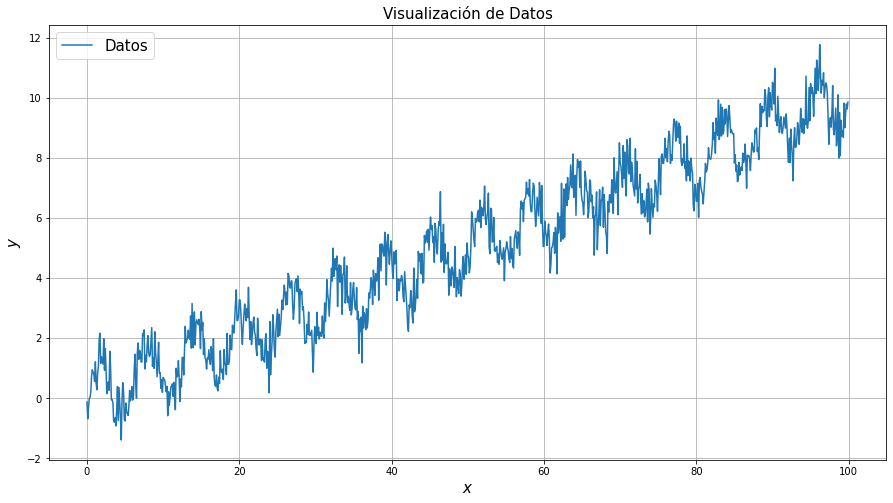

In [27]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.title("Visualización de Datos",fontsize=15)
plt.plot(time,value,'-')
plt.legend(["Datos"],fontsize=15)
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.grid()
plt.show()

In [28]:
model3 = tf.keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(1,),activation='elu'),
    keras.layers.Dense(units=20,activation='elu'),
    keras.layers.Dense(units=30,activation='elu'),
    keras.layers.Dense(units=40,activation='elu'),
    keras.layers.Dense(units=50,activation='elu'),
    keras.layers.Dense(units=60,activation='elu'),
    keras.layers.Dense(units=70,activation='elu'),
    keras.layers.Dense(units=1)
    ])

model3.compile(optimizer='adam', loss='mean_squared_error')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 20)                220       
                                                                 
 dense_7 (Dense)             (None, 30)                630       
                                                                 
 dense_8 (Dense)             (None, 40)                1240      
                                                                 
 dense_9 (Dense)             (None, 50)                2050      
                                                                 
 dense_10 (Dense)            (None, 60)                3060      
                                                                 
 dense_11 (Dense)            (None, 70)               

In [29]:
def animate3(i):
    if i<n_iter:
        line.set_ydata(predecir3[i,:])

In [30]:
n_iter=100

predecir3=np.zeros((n_iter,len(time)))

for i in range(n_iter):
    model3.fit(time, value, epochs=10,verbose=1)
    predecir3[i,:]=model3.predict(time).reshape(1,-1)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 7.7605
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8623
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7702
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7575
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7422
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7374
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7565
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7567
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7574
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7588
Epoch 1/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7642
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7468
Epoch 3/10
32/32 [==============================] -

32/32 [==============================] - 0s 2ms/step - loss: 0.7246
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7050
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7315
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7786
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7279
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7292
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7672
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7053
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7204
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7398
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7337
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 6/10
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.6914
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7228
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7328
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7421
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6796
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7278
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7034
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6793
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6740
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6823
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7029
Epoch 9/10
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.6597
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6546
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6589
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6691
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6615
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6905
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6510
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6649
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6629
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6980
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6609
Epoch 2/10
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.6487
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6466
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6426
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6564
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6570
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6552
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6431
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6557
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6507
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6557
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6645
Epoch 5/10
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.6301
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6643
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6266
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6386
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6271
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6327
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6217
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6185
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6525
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6286
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6256
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6616
Epoch 8/10
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.6182
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6285
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6313
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6017
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6141
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5982
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5910
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6063
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6356
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6074
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6084
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6126
Epoch 1/10
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 0.5805
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5880
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5980
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5986
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5817
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5935
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5920
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5938
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5963
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6159
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6090
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5781
Epoch 4/10
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 3ms/step - loss: 0.5642
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5616
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5699
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5518
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5640
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5606
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5629
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5640
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5765
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5634
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5821
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5592
Epoch 7/10
32/32 [==============================] - 0s 2ms/ste

32/32 [==============================] - 0s 2ms/step - loss: 0.5514
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5336
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5517
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5654
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5305
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5384
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5265
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5349
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5383
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5326
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5339
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5458
Epoch 10/10
32/32 [==============================] - 0s 2ms/st

In [41]:
fig = plt.figure(figsize=(12,5))
axes = fig.add_subplot(1,1,1)

plt.plot(time,value,'b-',scaley=True, scalex=True)

line, = axes.plot(time, predecir3[0,:], 'r-')

ani3 = FuncAnimation(fig=fig, func=animate3, interval=100)

video = ani3.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()         

### <span style="color:blue">Visualizaciones en 2D</span>

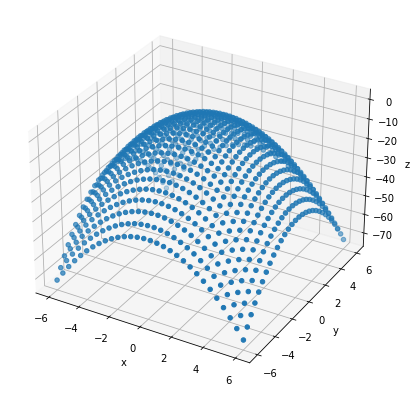

In [33]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Generar Datos

def f(x, y):
    return -(x ** 2 + y ** 2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.close('all')

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [34]:
data = np.array([X, Y, Z]).reshape(3, -1).T
df_data = pd.DataFrame(data,columns=['x','y','z'])
df_data

,x,y,z
0,-6.000000,-6.0,-72.000000
1,-5.586207,-6.0,-67.205707
2,-5.172414,-6.0,-62.753864
3,-4.758621,-6.0,-58.644471
4,-4.344828,-6.0,-54.877527
...,...,...,...
895,4.344828,6.0,-54.877527
896,4.758621,6.0,-58.644471
897,5.172414,6.0,-62.753864
898,5.586207,6.0,-67.205707


In [35]:
model4 = tf.keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(2,),activation='elu'),
    keras.layers.Dense(units=20,activation='elu'),
    keras.layers.Dense(units=1)
    ])

model4.compile(optimizer='adam', loss='mean_squared_error')
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                30        
                                                                 
 dense_14 (Dense)            (None, 20)                220       
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [36]:
n_iter=150

predecir4=np.zeros((n_iter+1,len(df_data['z'])))
predecir4[0,:]=model4.predict(df_data[['x','y']]).reshape(1,-1)

for i in range(n_iter):
    model4.fit(df_data[['x','y']].values, df_data['z'].values, epochs=1,verbose=1)
    predecir4[i+1,:]=model4.predict(df_data[['x','y']]).reshape(1,-1)

29/29 [==============================] - 0s 1ms/step - loss: 5.3044


29/29 [==============================] - 0s 1ms/step - loss: 4.3648


In [37]:
def animate4(i):
    if i<n_iter:
        ax.clear()
        ax.set_zlim(-70,10)
        ax.scatter3D(X, Y, Z)
        ax.plot_surface(X,Y,predecir4_grid[i,:,:],cmap='jet',shade=True,alpha=0.8)

In [38]:
predecir4_grid = predecir4.reshape(n_iter+1,X.shape[0],X.shape[1])
predecir4_grid.shape

(151, 30, 30)

In [39]:
plt.close('all')
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

ax.set_zlim(-70,10)
#ax.view_init(65, 35)
ax.scatter3D(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot_surface(X,Y,predecir4_grid[0,:,:],cmap='jet',shade=True,alpha=0.8)


ani4 = FuncAnimation(fig=fig, func=animate4, interval=150)

video = ani4.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()